In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("Student Mental health.csv")
display(df.head())
print("Setup Complete")

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


Setup Complete


In [3]:
df = df.drop(['Timestamp', 'What is your course?', 'What is your CGPA?'], axis=1)

In [4]:
df = df[['Choose your gender', 'Your current year of Study', 'Marital status', 'Do you have Depression?', 
         'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?']].apply(lambda x: x.str.lower())

In [5]:
df

,Choose your gender,Your current year of Study,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,female,year 1,no,yes,no,yes,no
1,male,year 2,no,no,yes,no,no
2,male,year 1,no,yes,yes,yes,no
3,female,year 3,yes,yes,no,no,no
4,male,year 4,no,no,no,no,no
...,...,...,...,...,...,...,...
96,female,year 1,no,no,yes,no,no
97,male,year 2,no,yes,yes,no,no
98,female,year 3,yes,yes,no,yes,no
99,female,year 4,no,no,no,no,no


In [6]:
df['Choose your gender'] = df['Choose your gender'].map({'male': 0, 'female' : 1})
df['Your current year of Study'] = df['Your current year of Study'].map({'year 1': 1, 'year 2' : 2, 'year 3': 3, 'year 4': 4})
df['Marital status'] = df['Marital status'].map({'no': 0, 'yes' : 1})
df['Do you have Depression?'] = df['Do you have Depression?'].map({'no': 0, 'yes' : 1})
df['Do you have Anxiety?'] = df['Do you have Anxiety?'].map({'no': 0, 'yes' : 1})
df['Do you have Panic attack?'] = df['Do you have Panic attack?'].map({'no': 0, 'yes' : 1})
df['Did you seek any specialist for a treatment?'] = df['Did you seek any specialist for a treatment?'].map({'no': 0, 'yes' : 1})

In [7]:
df

,Choose your gender,Your current year of Study,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,1,1,0,1,0,1,0
1,0,2,0,0,1,0,0
2,0,1,0,1,1,1,0
3,1,3,1,1,0,0,0
4,0,4,0,0,0,0,0
...,...,...,...,...,...,...,...
96,1,1,0,0,1,0,0
97,0,2,0,1,1,0,0
98,1,3,1,1,0,1,0
99,1,4,0,0,0,0,0


In [25]:
y = df['Do you have Depression?']

x = df.drop('Do you have Depression?', axis=1)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=11)

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(max_depth= 3, random_state=11)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8823529411764706

[Text(0.625, 0.875, 'Marital status <= 0.5\ngini = 0.468\nsamples = 67\nvalue = [42, 25]'),
 Text(0.5, 0.625, 'Choose your gender <= 0.5\ngini = 0.388\nsamples = 57\nvalue = [42, 15]'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'Your current year of Study <= 1.5\ngini = 0.18\nsamples = 20\nvalue = [18, 2]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.375, 0.125, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.75, 0.375, 'Do you have Anxiety? <= 0.5\ngini = 0.456\nsamples = 37\nvalue = [24, 13]'),
 Text(0.625, 0.125, 'gini = 0.363\nsamples = 21\nvalue = [16, 5]'),
 Text(0.875, 0.125, 'gini = 0.5\nsamples = 16\nvalue = [8, 8]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6875, 0.75, '  False')]

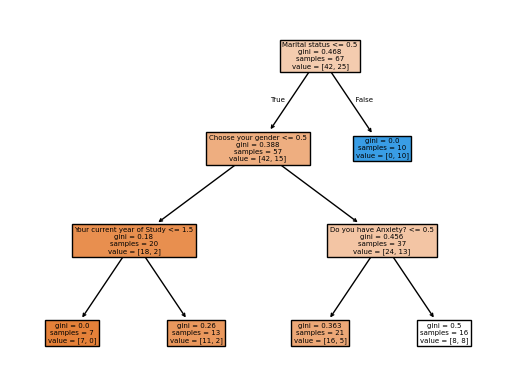

In [21]:
plot_tree(model, feature_names=x.columns, filled=True)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=11)
rf_model.fit(x_train, y_train)
rf_model.score(x_test, y_test)

0.9117647058823529

[Text(0.4659090909090909, 0.9285714285714286, 'Do you have Anxiety? <= 0.5\ngini = 0.487\nsamples = 45\nvalue = [39, 28]'),
 Text(0.22727272727272727, 0.7857142857142857, 'Choose your gender <= 0.5\ngini = 0.404\nsamples = 23\nvalue = [23, 9]'),
 Text(0.34659090909090906, 0.8571428571428572, 'True  '),
 Text(0.09090909090909091, 0.6428571428571429, 'Your current year of Study <= 2.5\ngini = 0.231\nsamples = 10\nvalue = [13, 2]'),
 Text(0.045454545454545456, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [11, 0]'),
 Text(0.13636363636363635, 0.5, 'Your current year of Study <= 3.5\ngini = 0.5\nsamples = 3\nvalue = [2, 2]'),
 Text(0.09090909090909091, 0.35714285714285715, 'Do you have Panic attack? <= 0.5\ngini = 0.444\nsamples = 2\nvalue = [1, 2]'),
 Text(0.045454545454545456, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.13636363636363635, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(0.18181818181818182, 0.35714285714285715, 'gini = 0.0\nsam

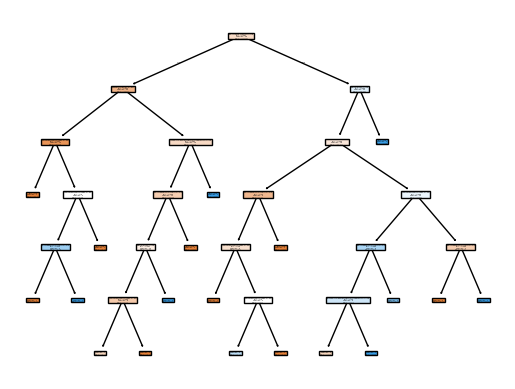

In [24]:
plot_tree(rf_model.estimators_[0], feature_names=x.columns, filled=True)